使用するモジュールのimport

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from pandas import DataFrame

In [2]:
# カレントディレクトリの変更（自分の作業フォルダのパスを設定）
os.chdir('/Users/narizuka/GoogleDrive/My Drive/document/講義/立正/情報処理の応用/')
# os.chdir("G:\\マイドライブ\\document\\講義\\立正\\情報処理の応用")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/narizuka/GoogleDrive/My Drive/document/講義/立正/情報処理の応用/'

In [4]:
pd.set_option('max_rows', 20)  # 表示する行数
pd.set_option('precision', 2)  # 小数点以下の表示桁
np.set_printoptions(suppress=True, precision=2)
%precision 2  # 小数点以下の表示桁

'%r'

google colab を使う際のセッティング

In [ ]:
# matplotlibで日本語表示
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

In [ ]:
# google driveをマウントする
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# カレントディレクトリを変更（自分の作業フォルダのパスを設定）
os.chdir('/content/drive/My Drive/document/講義/立正/情報処理の応用/')

jupyter lab のcssスタイルを変更（必要な場合だけ）

In [27]:
from IPython.core.display import display, HTML
display(HTML("<style>.jp-Cell { width:100% !important; margin: 0 auto; }</style>"))
with open('./material/variables.css') as f: 
    css = f.read().replace(';', ' !important;')
display(HTML('<style type="text/css">%s</style>'%css))

## 散布図と相関係数

- アヤメのデータセット
    - Sepal Length – がく片の長さ(cm)
    - Sepal Width – がく片の幅(cm)
    - Petal Length – 花弁の長さ(cm)
    - Petal Width – 花弁の幅(cm)

In [5]:
# アヤメデータの読み込み
Iris = pd.read_csv('material/sec_2-1/Iris.csv').iloc[:, 1:5]
Iris.columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [6]:
Iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### がく片の長さと幅の相関

Text(0, 0.5, 'Sepal Width [cm]')

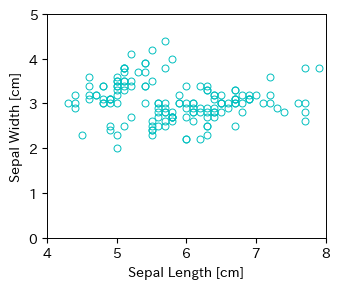

In [7]:
# 散布図
fig, ax = plt.subplots()
ax.plot(Iris['Sepal_Length'], Iris['Sepal_Width'], 'co', mfc='None')
ax.set_xlim(4, 8); ax.set_ylim(0, 5)
ax.set_xlabel('Sepal Length [cm]')
ax.set_ylabel('Sepal Width [cm]')
# fig.savefig('figure/sepal_l-w.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [13]:
# 相関係数
Iris.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.00,-0.11,0.87,0.82
Sepal_Width,-0.11,1.00,-0.42,-0.36
Petal_Length,0.87,-0.42,1.00,0.96
Petal_Width,0.82,-0.36,0.96,1.00


In [14]:
Iris.corr()['Sepal_Length']['Sepal_Width']

-0.10936924995064935

In [11]:
np.corrcoef(Iris['Sepal_Length'], Iris['Sepal_Width'])

array([[ 1.  , -0.11],
       [-0.11,  1.  ]])

### 花弁の長さと幅の相関

Text(0, 0.5, 'Petal Width [cm]')

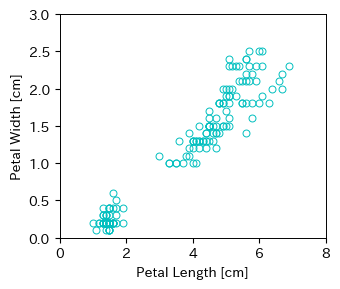

In [11]:
# 散布図
fig, ax = plt.subplots()
ax.plot(Iris['Petal_Length'], Iris['Petal_Width'], 'co', mfc='None')
ax.set_xlim(0, 8); ax.set_ylim(0, 3)
ax.set_xlabel('Petal Length [cm]')
ax.set_ylabel('Petal Width [cm]')
# fig.savefig('figure/petal_l-w.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [12]:
# 相関係数
Iris.corr()['Petal_Length']['Petal_Width']

0.9627570970509667

## 実例：警察職員数と刑法犯認知件数の関係

### STEP1: Problem
- ある統計によると，警察官の数と犯罪の件数には正の相関関係があると言われている．
- では，これらの間に因果関係はあるだろうか？

### STEP2, 3: Plan, Data

- 都道府県別の警察職員数と刑法犯認知件数のデータを用い，これらの相関関係および因果関係の有無を調べることにする．
- 今回用いるデータは以下の通りである：
    - 都道府県別の刑法犯認知件数
        - [H27年，都道府県別刑法犯の認知件数，検挙件数，検挙人員](https://www.npa.go.jp/hakusyo/h27/data.html)
    - 都道府県別の警察職員数
        - [H27年，地方公共団体定員管理関係](https://www.soumu.go.jp/main_sosiki/jichi_gyousei/c-gyousei/teiin/109981data.html)
     - 都道府県別の人口
         - [住民基本台帳に基づく人口，人口動態及び世帯数調査](https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200241&tstat=000001039591&cycle=7&year=20150&month=0&tclass1=000001039601&result_back=1&tclass2val=0)

In [13]:
# データの読み込み
Crime = pd.read_csv('material/sec_2-3/number_crime.csv', index_col='p')

- 下図は2015年度の都道府県別警察職員数と刑法犯認知件数の散布図を表している．
- この散布図を見ると確かに両者には正の相関関係があり，相関係数も高くなりそうである．
- では，このことから警察職員数と刑法犯認知件数に因果関係があるといえるだろうか？
- これを調べるため，今回は都道府県の人口を第3の変数と仮定して解析を行う．

Text(0, 0.5, '刑法犯認知件数（万件）')

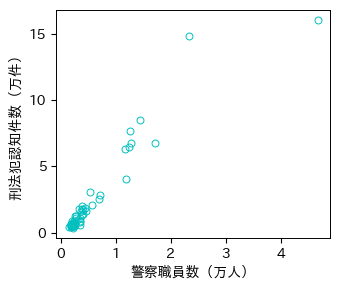

In [14]:
fig, ax = plt.subplots()
ax.plot(Crime['警察職員数']/10000, Crime['刑法犯認知件数']/10000, 'co', mfc='None')
ax.set_xticks([0, 1, 2, 3, 4]); ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel('警察職員数（万人）')
ax.set_ylabel('刑法犯認知件数（万件）')
# fig.savefig('figure/police_crime.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

#### 実習：相関係数
- 上図について，相関係数を求めよ．

In [7]:
# 相関係数
Crime.corr()['刑法犯認知件数']['警察職員数']

0.9424697256476458

### STEP4: Analysis

- まず，都道府県の人口を第3の変数と仮定し，警察職員数と刑法犯認知件数の関係が疑似相関であるか調べる．

#### 実習：人口との散布図
- 刑法犯認知件数と警察職員数のそれぞれについて人口との散布図を描け．
- これらの散布図の相関係数を求め，それが何を意味するか考察せよ．

Text(0, 0.5, '刑法犯認知件数（万件）')

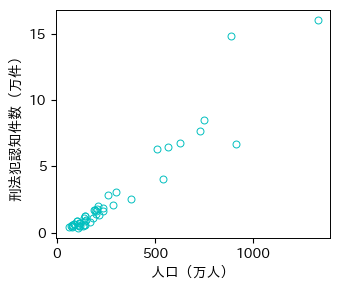

In [15]:
fig, ax = plt.subplots()
ax.plot(Crime['人口']/10000, Crime['刑法犯認知件数']/10000, 'co', mfc='None')
ax.set_xticks([0, 500, 1000]); ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel('人口（万人）')
ax.set_ylabel('刑法犯認知件数（万件）')
# fig.savefig('figure/pop_crime.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [16]:
# 相関係数
Crime.corr()['人口']['刑法犯認知件数']

0.9576469769539204

Text(0, 0.5, '警察職員数（万人）')

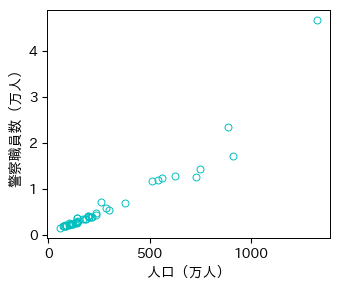

In [17]:
fig, ax = plt.subplots()
ax.plot(Crime['人口']/10000, Crime['警察職員数']/10000, 'co', mfc='None')
ax.set_xticks([0, 500, 1000]); ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xlabel('人口（万人）')
ax.set_ylabel('警察職員数（万人）')
# fig.savefig('figure/pop_police.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [18]:
# 相関係数
Crime.corr()['人口']['警察職員数']

0.9478341323186452

#### 実習：人口の影響を取り除く方法
- 刑法犯認知件数と警察職員数の散布図について，人口が100万人未満，100万人以上200万人未満，200万人以上500万人未満で層別し，結果を考察せよ．
- 人口1000人あたりの警察職員数と刑法犯罪認知件数に関する散布図を描いてその相関係数を求め，結果を考察せよ．
- 人口の影響を除いた警察職員数と刑法犯認知件数の偏相関係数を求め，結果を考察せよ．

In [25]:
cnd1 = (Crime['人口'] <  1000000)
cnd2 = (Crime['人口'] >= 1000000) & (Crime['人口'] < 2000000)
cnd3 = (Crime['人口'] >= 2000000) & (Crime['人口'] < 5000000)

Text(0, 0.5, '刑法犯認知件数（万件）')

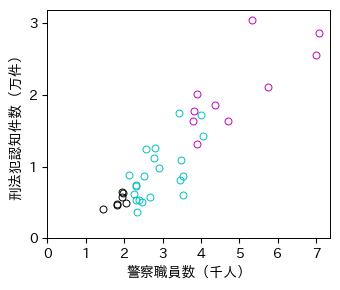

In [26]:
# 層別散布図
fig, ax = plt.subplots()
ax.plot(Crime.loc[cnd1, '警察職員数']/1000, Crime.loc[cnd1, '刑法犯認知件数']/10000, 'ko', mfc='None')
ax.plot(Crime.loc[cnd2, '警察職員数']/1000, Crime.loc[cnd2, '刑法犯認知件数']/10000, 'co', mfc='None')
ax.plot(Crime.loc[cnd3, '警察職員数']/1000, Crime.loc[cnd3, '刑法犯認知件数']/10000, 'mo', mfc='None')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7]); ax.set_yticks([0, 1, 2, 3])
ax.set_xlabel('警察職員数（千人）')
ax.set_ylabel('刑法犯認知件数（万件）')
# fig.savefig('figure/police_crime2.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

Text(0, 0.5, '刑法犯認知件数（人口1000人あたり）')

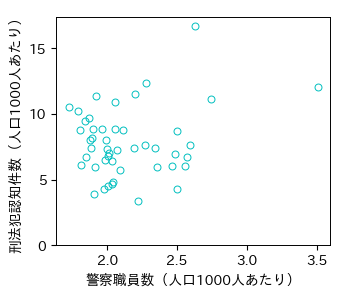

In [24]:
# 人口1000人あたりの散布図
fig, ax = plt.subplots()
ax.plot(1000*Crime['警察職員数']/Crime['人口'], 1000*Crime['刑法犯認知件数']/Crime['人口'], 'co', mfc='None')
ax.set_xticks([2, 2.5, 3, 3.5]); ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel('警察職員数（人口1000人あたり）')
ax.set_ylabel('刑法犯認知件数（人口1000人あたり）')
# fig.savefig('figure/police_crime3.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [23]:
# 偏相関係数
r = Crime.corr()
cov = r['警察職員数']['刑法犯認知件数'] - r['警察職員数']['人口']*r['刑法犯認知件数']['人口']
denom = np.sqrt((1-r['警察職員数']['人口']**2)*(1-r['刑法犯認知件数']['人口']**2))
cov / denom

0.37891466581890526

### STEP 5: Conclusion

#### 実習
- 解析の結果から，警察職員数と刑法犯認知件数の間に因果関係があるかどうか考察せよ．